<a href="https://colab.research.google.com/github/konung00/DS_ML/blob/main/Statistics_HW_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework for statistics module

Rules for code style:
* All the code in this notebook
* Imports are provided in the head of the notebook
* All the cells could be ran in the right order from the top to the bottom
* Commentaries are required
* All the plots should have: title, axis labels and summaries (if necessary)
* Main summaries are provided in cells using markdown **(your analysis of the results and data is very important!!!)**
* Try to use functions and classes to reduce duplicated code blocks to minimum

Also you can use $\LaTeX$ to write formulas. F.e. $\bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i$ or on a new line:
$$
    \bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i
$$
To do so, you can write anything between $\$ \quad \$$ (or  $ \$\$ \quad\$\$ $).

### Criteria (50 points total):
* Task 1 (17 points)

    * Requested formulas are provided - 4 points
    * All necessary experiments are done - 6 points
    * Results are analysed with commentaries - 7 points
* Tasks 2.1 и 2.2 (16 points)

    * Visualization and/or simple exploratory data analysis are implemented - 2 points
    * Hypotheses are tested - 2 points
    * Results are analysed with commentaries - 4 points
* Task 3 (13 points)

    * Visualization and/or simple exploratory data analysis are implemented - 2 points
    * Hypotheses are tested - 4 points
    * Data was aggregated properly - 2 points
    * Results are analysed with commentaries - 5 points
* Extra points:

    * 4 points in case clear, "pythonic" and understandable code style.

Good work: 40+ points.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('bmh')

from pylab import rcParams

# plots in svg look more precise
%config InlineBackend.figure_format = 'svg'

# Task 1

## Stratification

The example:

Let's assume, we need to estimate a mean votes count for every election candidate. Suppose there are 3 cities in a country: 1 million factory workers live in city A, 2 million office workers live in city B, and 3 million senior citizens live in city B. We can choose a random sample of 60 votes from the entire population, but there is some chance that the random sample will be poorly balanced between these cities and, therefore, will be biased and of little use ("average temperature in the hospital"), causing a significant error in the estimation. Instead, if we choose to use a simple random sample of 10, 20 and 30 votes from cities A, B and C, respectively, we can get a smaller error in the estimate with the same total sample size. This technique is called stratification.


### The task

Suppose the population is a mixture of 3 normally distributed CBs. In other words, the population can be divided into 3 strata.
$$
    F(X) = a_1 F(X_1) + a_2 F(X_2) + a_3 F(X_3)
$$

**Goals:**  

1. Derive (for example, in the block below, using Markdown) the formulas for point estimates of the mathematical expectation and variance for the average value of subsamples formed in different ways:
- random selection from the entire population;
- random selection of strata in proportion to strata volumes;
- random selection according to the optimal sub-sampling.

2. Calculate point estimates of the mathematical expectation and variance of the mean value for each data sampling method from p.1, provided:
* Experiments should be conducted for 3 cases (for every method from p.1 each):
     * all strata have the same mat. expectations and variance;
     * strata have different mat. expectations, but the same variance;
     * strata have different mat. expectations and variance.
* For each experiment plot histogram of General Population data (using matplotlib or seaborn packages);
* Plot boxplots for sample mean estimated using each sampling method on a single figure to compare the results. Repeat for each experiment.
* You are provided with `GeneralPopulation` class. It already has all necessary methods for sampling and creating general population as a mixture of strata.
* Your goal is to write functions to conduct experiments and visualize the results.   
* Also provide commentaries as summaries and analysis of results after each visualization.


## Solution for Task 1

### Formulas:

#### Stratified sample point estimations:

Sample mean: $\bar{X}_k = \frac{1}{n}\displaystyle\sum_{i=1}^nX_{ik}$

Sample variance: $D^*_k = \displaystyle\frac{1}{n_k}\sum_{i=1}^{n_k}(X_{ik} - \bar{X}_k)^2$


#### Sample volumes if they are sampled proportionally:

Volumes for proportional sampling: $n_k = nW_k$, where $k = \overline{1,L}$, $W_k$ - strata's ratio and $n = n_1+...+n_l$ 

Mean expectation estimation for the mixture proportionally: $E\bar{X}_s = \displaystyle\sum_{k=1}^LW_kE\bar{X}_k$,

Variance expectation estimation of the sample mean for the mixture proportionally: $D(\bar{X}_s) = \displaystyle\sum_{k=l}^{L}W^2_kD(\bar{X}_k) = \sum_{k=1}^{L}W^2_k\frac{\sigma^2_k}{n_k}$

Sample variance for the mixture proportionally: $D^*_s = \displaystyle\sum_{k=1}^LW_kD^*_k + \sum_{k=1}^LW_k(\sum_{i=1}^LW_i\bar{X}_i - \bar{X}_k)^2$

Expectation variance for mixture proportionally: $E(D^*_s) = \displaystyle\sum_{k=1}^LW_kED^*_k + \sum_{k=1}^LW_kE(\sum_{i=1}^LW_i\bar{X}_i - \bar{X}_k)^2$

Variance of mixture sample variance: $D(D^*_s) = \displaystyle\sum_{k=1}^{L}W^2_kD(D^*_k) + D(\sum_{k=1}^{L}W_k(\sum_{i=1}^{L}W_i\bar{X}_i - \bar{X}_k)^2)$

#### Sample volumes if they are optimal sampled (Neyman's method):

Volumes for optimal sampling: $\displaystyle\widetilde{n}_k = n\frac{W_k\sigma_k}{\sum_{k=1}^{L} W_k\sigma_k}$, where $k = \overline{1,L}$, $W_k$ - strata's ratio and $n = n_1+...+n_l$ 

Mean expectation estimation for the mixture proportionally: $E\bar{X}_s = \displaystyle\sum_{k=1}^L\widetilde{n}_k\bar{X}_k$,

Variance expectation estimation of the sample mean for the mixture proportionally: $D(\bar{X}_s) = \displaystyle\sum_{k=l}^{L}W^2_kD(\bar{X}_k) = \sum_{k=1}^{L}W^2_k\frac{\sigma^2_k}{\widetilde{n}_k}$

Sample variance for the mixture proportionally: $D^*_s = \displaystyle\sum_{k=1}^LW_kD^*_k + \sum_{k=1}^LW_k(\sum_{i=1}^LW_i\bar{X}_i - \bar{X}_k)^2$

Expectation variance for mixture proportionally: $E(D^*_s) = \displaystyle\sum_{k=1}^LW_kED^*_k + \sum_{k=1}^LW_kE(\sum_{i=1}^LW_i\bar{X}_i - \bar{X}_k)^2$

Variance of mixture sample variance: $D(D^*_s) = \displaystyle\sum_{k=1}^{L}W^2_kD(D^*_k) + D(\sum_{k=1}^{L}W_k(\sum_{i=1}^{L}W_i\bar{X}_i - \bar{X}_k)^2)$

**GeneralPopulation class**  
Already has methods for creating general population as a mixture of strata, for generating subsample with random, optimal and stratified techniques:

In [ ]:
from numpy.ma.core import size
class GeneralPopulation:

  def __init__(self, 
               means: [float], 
               stds: [float], 
               sizes: [int], 
               random_state: int = 15
               ):
    """
    Initializes our General Population and saves the given distributions
    
    :param means: List of expectations for normal distributions
    :param stds: List of standard deviations for normal distributions
    :param sizes: How many objects will be in each strata
    :param random_state: Parameter fixing randomness. Needed so that when conducting
    experiment repeatedly with the same input parameters, the results remained the same
    """
    self.strats = [st.norm(mean, std) for mean, std in zip(means, stds)]
    self._sample(sizes)
    self.random_state = random_state

  def _sample(self, sizes):
        """Creates a general population sample as a mixture of strata
        
        :param sizes: List with sample sizes of the corresponding normal distributions
        """
        self.strats_samples = [rv.rvs(size) for rv, size in zip(self.strats, sizes)]
        self.general_samples = np.hstack(self.strats_samples)
        self.N = self.general_samples.shape[0]
        
        # number of strata
        self.count_strats = len(sizes)
        
        # ratios for every strata in GP
        self.ws = [size/self.N for size in sizes]
        
        # ME and Std for GP
        self.m = np.mean(self.general_samples)
        self.sigma = np.std(self.general_samples)
        
        # ME and std for all strata
        self.ms = [np.mean(strat_sample) for strat_sample in self.strats_samples]
        self.sigmas = [np.std(strat_sample) for strat_sample in self.strats_samples]

  def random_subsampling(self, size):
      """Creates a random subset of the entire population
      
      :param sizes: subsample size
      """
      rc = np.random.choice(self.general_samples, size=size) 
      return rc
      
  def proportional_subsampling(self, size):
      """Creates a subsample with the number of elements, proportional shares of strata
      
      :param sizes: subsample size
      """
      self.strats_size_proport = [int(np.floor(size*w)) for w in self.ws]
      
      rc = []
      for k in range(len(self.strats_size_proport)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_proport[k]))
      
      return rc
      
  def optimal_subsampling(self, size):
      """Creates a subsample with the optimal number of elements relative to strata
      
      :param sizes: subsample size
      """
      sum_denom = 0
      for k in range(self.count_strats):
          sum_denom += self.ws[k] * self.sigmas[k]
      
      self.strats_size_optimal = [int(np.floor((size*w*sigma)/sum_denom)) for w, sigma in zip(self.ws, self.sigmas)]
      if 0 in self.strats_size_optimal:
          raise ValueError('Strats size is 0, please change variance of smallest strat!')
      
      rc = []
      for k in range(len(self.strats_size_optimal)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_optimal[k]))
      
      return rc   

  def run_experiments(self, n_sub, subsampling_method, n_experiments=1000):
      """Conducts a series of experiments and saves the results
      
      :param subsampling_method: method for creating a subsample
      :param n_experiments: number of experiment starts
      """
      means_s = []
      
      # varians(user)
      var_s = []
      
      if(len(self.general_samples)<100):
          n_sub = 20
      
      if(subsampling_method == 'random_subsampling'):
          for n in range(n_experiments):
              rc = self.random_subsampling(n_sub)
              
              mean = rc.sum()/len(rc)
              means_s.append(mean)
              var_s.append((rc.sum()**2/len(rc)) - (rc.sum()/len(rc))**2)
              
      else:
          for n in range(n_experiments):
              if(subsampling_method == 'proportional_subsampling'):
                  rc = self.proportional_subsampling(n_sub)
              elif(subsampling_method == 'optimal_subsampling'):
                  rc = self.optimal_subsampling(n_sub)
              
              strats_mean = []
              # variance
              strats_var = []
      
              for k in range(len(rc)):
                  strats_mean.append(sum(rc[k])/len(rc[k]))
                  strats_var.append(np.var(rc[k]))
      
              # Mean for a mixture
              means_s.append(sum([w_k*mean_k for w_k, mean_k in zip(self.ws, strats_mean)]))

              # Variance for a mixture
              var_s.append((sum([w_k*mean_k**2 for w_k, mean_k in zip(self.ws, strats_mean)])) - (sum([w_k*mean_k for w_k, mean_k in zip(self.ws, strats_mean)]))**2)
              
      return [means_s, var_s]

Function for histogram plot:

In [ ]:
"""HERE IS YOUR CODE
It should be implemented as follows:
* Takes a GeneralPopulation class instance;
* Uses matplotlib or seaborn packages to plot distribution for general population;
* Don't forget a title, grid etc. 
"""

"""
def hist_plot(gp: GeneralPopulation):
  stratas = ['factory workers', 'office workers', 'senior citizens']
  colors = ['red', 'blue', 'green']
  samples = [gp.optimal_subsampling(100), gp.proportional_subsampling(150)]
  titles = ["Optimal subsamples", "Proportional subsamples"]
  for sample, title in zip(samples, titles):
    fig, ax = plt.subplots()
    for data, color, strata in zip(sample, colors, stratas):
      sns.histplot(data=data, stat='density', color=color, ax=ax, kde=True, label=strata)
      ax.set_title(title)
      ax.legend()
"""

def hist_plot_experement(exp_dict: dict):

  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
  i = 0
  for key, values in exp_dict.items():
    sns.histplot(data=values[0], stat='density', kde=True, ax=ax[i])
    ax[i].set_xlabel("Mean value")
    ax[i].set_title(key)
    i += 1

Function for plotting Boxplots for sample mean:

In [ ]:
"""HERE IS YOUR CODE
It should be implemented as follows:
* Takes a GeneralPopulation class instance;
* Runs method `run_experiments` for each sampling method and gets vector of mean values;
* Uses matplotlib or seaborn packages to plot boxplots of mean values for each subsampling techniques;
* Axis Y == Mean values; Axis X == subsampling methods;
* Don't forget a title, grid etc. 
"""


def df_generation(exp_dict: dict) -> pd.DataFrame:
  """ Creates a data frame with mean and variance for the each subsampling method """

  data = pd.DataFrame()

  for key, values in exp_dict.items():
    df = pd.DataFrame(values).T
    df.columns = ["mean", "variance"]
    df["method"] = key
    data = pd.concat([data, df], sort=False, axis=0)
  
  return data
  
  
  
def box_plot_experement(df: pd.DataFrame) -> None:
  """ Builds a couple of boxplots to compare mean and variance for for the each subsampling method """

  columns = ["mean", "variance"]
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
  i = 0
  for column in columns:
    pl = sns.boxplot(data=df, x='method', y=column, ax=ax[i])
    pl.axes.set_title(f"{column.capitalize()} values")
    #pl.set_xlabel("method", fontsize=14)
    pl.tick_params(axis='x', labelrotation = 45)
    i += 1

In [ ]:
def batch_experement(gp: GeneralPopulation) -> dict:
  """ Return a batch of fulfilled exprerements """

  exp_dict = {}
  experements = ["random_subsampling", "proportional_subsampling", "optimal_subsampling"]
  
  for method in experements:
     exp_dict[method] = gp.run_experiments(100, method)

  return exp_dict

**Parameters for each General Population**  
You can use these or specify your own parameters for strata:

In [ ]:
SIZES = (150, 150, 150)
N_SUBSAMPLE = 150
EQUAL_MEAN_EQUAL_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 3, 3], 'sizes': SIZES}
DIFFERENT_MEAN_EQUAL_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 3, 3], 'sizes':SIZES}
EQUAL_MEAN_DIFFERENT_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 7, 11], 'sizes':SIZES}
DIFFERENT_MEAN_DIFFEREN_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 7, 11], 'sizes':SIZES}

**Initialization**

In [ ]:
# Create GeneralPopulation class instances here
equal_mean_equal_stds_args = GeneralPopulation(EQUAL_MEAN_EQUAL_STDS_ARGS['means'], EQUAL_MEAN_EQUAL_STDS_ARGS['stds'], EQUAL_MEAN_EQUAL_STDS_ARGS['sizes'])
equal_mean_equal_stds_args_exp_dict = batch_experement(equal_mean_equal_stds_args)

different_mean_equal_stds_args = GeneralPopulation(DIFFERENT_MEAN_EQUAL_STDS_ARGS['means'], DIFFERENT_MEAN_EQUAL_STDS_ARGS['stds'], DIFFERENT_MEAN_EQUAL_STDS_ARGS['sizes'])
different_mean_equal_stds_args_exp_dict = batch_experement(different_mean_equal_stds_args)

equal_mean_different_stds_args = GeneralPopulation(EQUAL_MEAN_DIFFERENT_STDS_ARGS['means'], EQUAL_MEAN_DIFFERENT_STDS_ARGS['stds'], EQUAL_MEAN_DIFFERENT_STDS_ARGS['sizes'])
equal_mean_different_stds_args_exp_dict = batch_experement(equal_mean_different_stds_args)

different_mean_differen_stds_args = GeneralPopulation(DIFFERENT_MEAN_DIFFEREN_STDS_ARGS['means'], DIFFERENT_MEAN_DIFFEREN_STDS_ARGS['stds'], DIFFERENT_MEAN_DIFFEREN_STDS_ARGS['sizes'])
different_mean_differen_stds_args_exp_dict = batch_experement(different_mean_differen_stds_args)

**General population with EQUAL means and EQUAL STDs of strata**  
Distribution histogram:

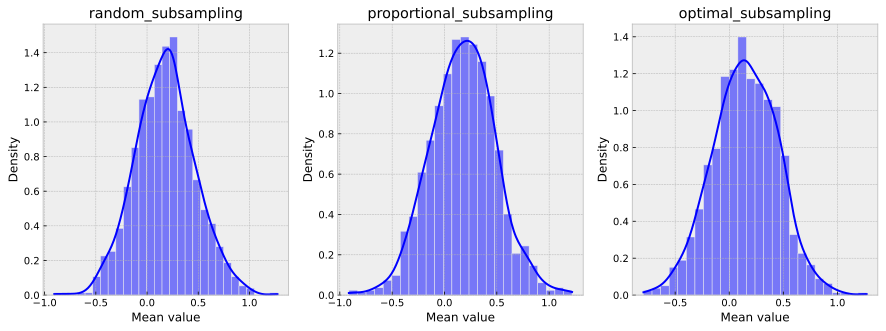

In [ ]:
# Run plotting for density
hist_plot_experement(equal_mean_equal_stds_args_exp_dict)

Boxplots for sample mean:

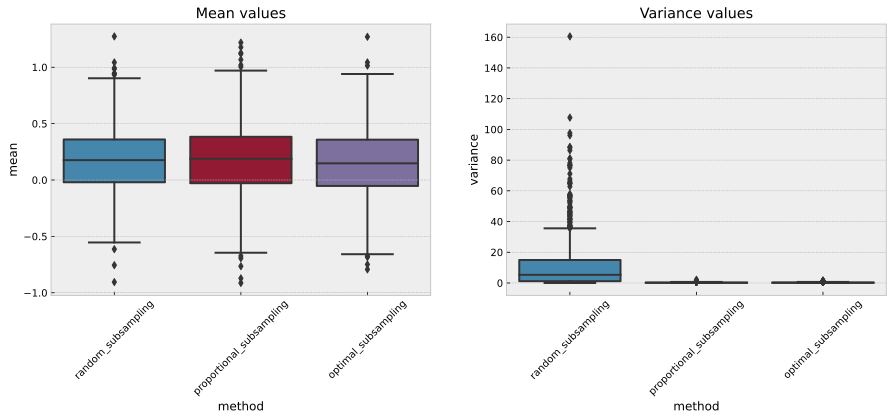

In [ ]:
# Run plotting for boxplots
box_plot_experement(df_generation(equal_mean_equal_stds_args_exp_dict))

**General population with DIFFERENT means and EQUAL STDs of strata**  
Distribution histogram:

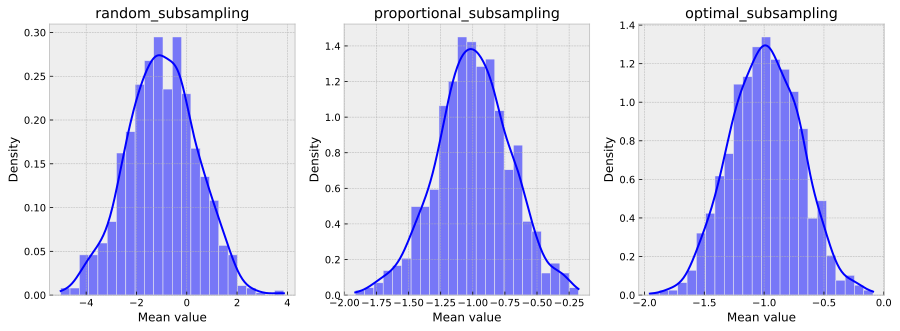

In [ ]:
# Run plotting for density
hist_plot_experement(different_mean_equal_stds_args_exp_dict)

Boxplots for sample mean:

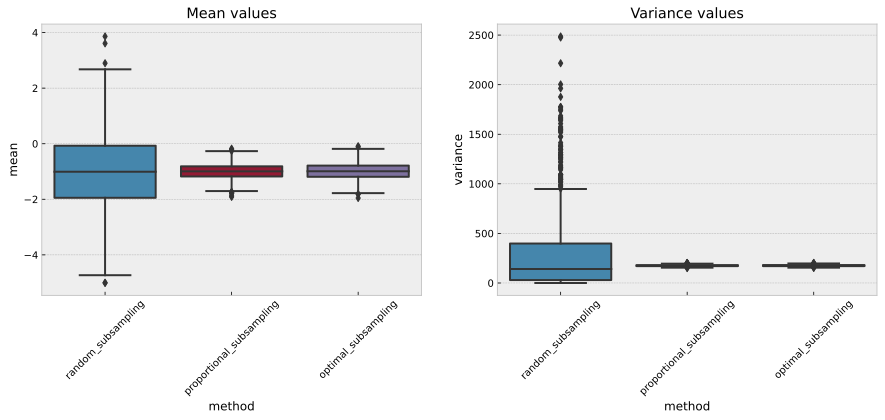

In [ ]:
# Run plotting for boxplots
box_plot_experement(df_generation(different_mean_equal_stds_args_exp_dict))

**General population with DIFFERENT means and DIFFERENT STDs of strata**  
Distribution histogram:

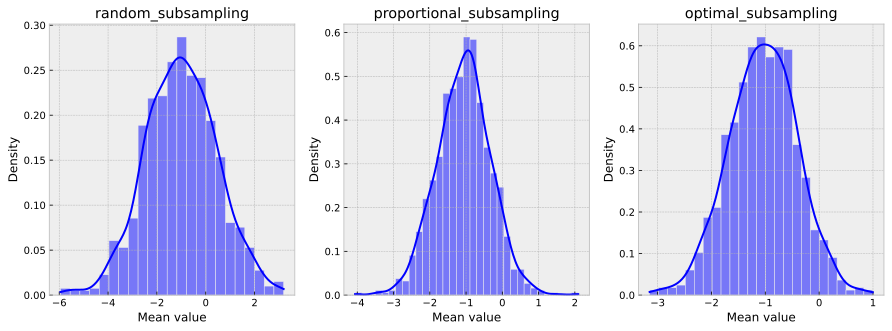

In [ ]:
# Run plotting for density
hist_plot_experement(different_mean_differen_stds_args_exp_dict)

Boxplots for sample mean:

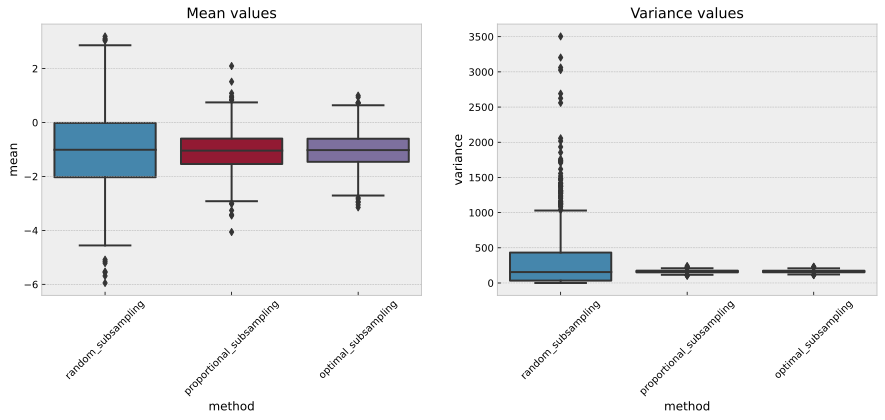

In [ ]:
# Run plotting for boxplots
box_plot_experement(df_generation(different_mean_differen_stds_args_exp_dict))

With the experiments conducted and statistics estimated we can generate these <b>conclusions</b>: 

Based on plots above we have an takeaway: when we're using stratas sampling we can reduce the variance thereby avoiding error in distribution. 

# Task 2



### Part 1
Using [this criteria](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/#:~:text=For%20the%20Pearson%20correlation%2C%20an,linear%20relationship%20between%20the%20variables.&text=If%20both%20variables%20tend%20to,represents%20the%20correlation%20slopes%20upward.), check whether there is a correlation between a brain size and intelligence for a dataset consisted both of men and women objects. Also check it for men and women subsamples separately.


### Part 2
Using $Chi^2$ criteria check whether there is a statistical difference between men's and women's choice of auto.  (Features `Sex` и `PreferCar`)


You can download dataset using the following:

In [ ]:
!pip install bds_courseware
from bds_courseware import read_drive_dataset
from bds_courseware import HOMEWORK_DATASETS
brain_data = read_drive_dataset(*HOMEWORK_DATASETS['brain'])  # PART 1
cars_prefes_data = read_drive_dataset(*HOMEWORK_DATASETS['car_perfs'])  # PART 2

Pre-processing:

In [ ]:
brain_data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,�,72.5,1001121
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545


In [ ]:
brain_data = brain_data.replace("�", np.nan)

In [ ]:
brain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     40 non-null     object
 1   FSIQ       40 non-null     int64 
 2   VIQ        40 non-null     int64 
 3   PIQ        40 non-null     int64 
 4   Weight     38 non-null     object
 5   Height     39 non-null     object
 6   MRI_Count  40 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.3+ KB


In [ ]:
brain_data.dropna(inplace=True)
brain_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 39
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     38 non-null     object
 1   FSIQ       38 non-null     int64 
 2   VIQ        38 non-null     int64 
 3   PIQ        38 non-null     int64 
 4   Weight     38 non-null     object
 5   Height     38 non-null     object
 6   MRI_Count  38 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.4+ KB


In [ ]:
brain_data["Weight"] = brain_data["Weight"].astype('float64')
brain_data["Height"] = brain_data["Height"].astype('float64')
brain_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 39
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     38 non-null     object 
 1   FSIQ       38 non-null     int64  
 2   VIQ        38 non-null     int64  
 3   PIQ        38 non-null     int64  
 4   Weight     38 non-null     float64
 5   Height     38 non-null     float64
 6   MRI_Count  38 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 2.4+ KB


##Part 1.
---

Let's build pair plots in order to check the strengh of correlation:

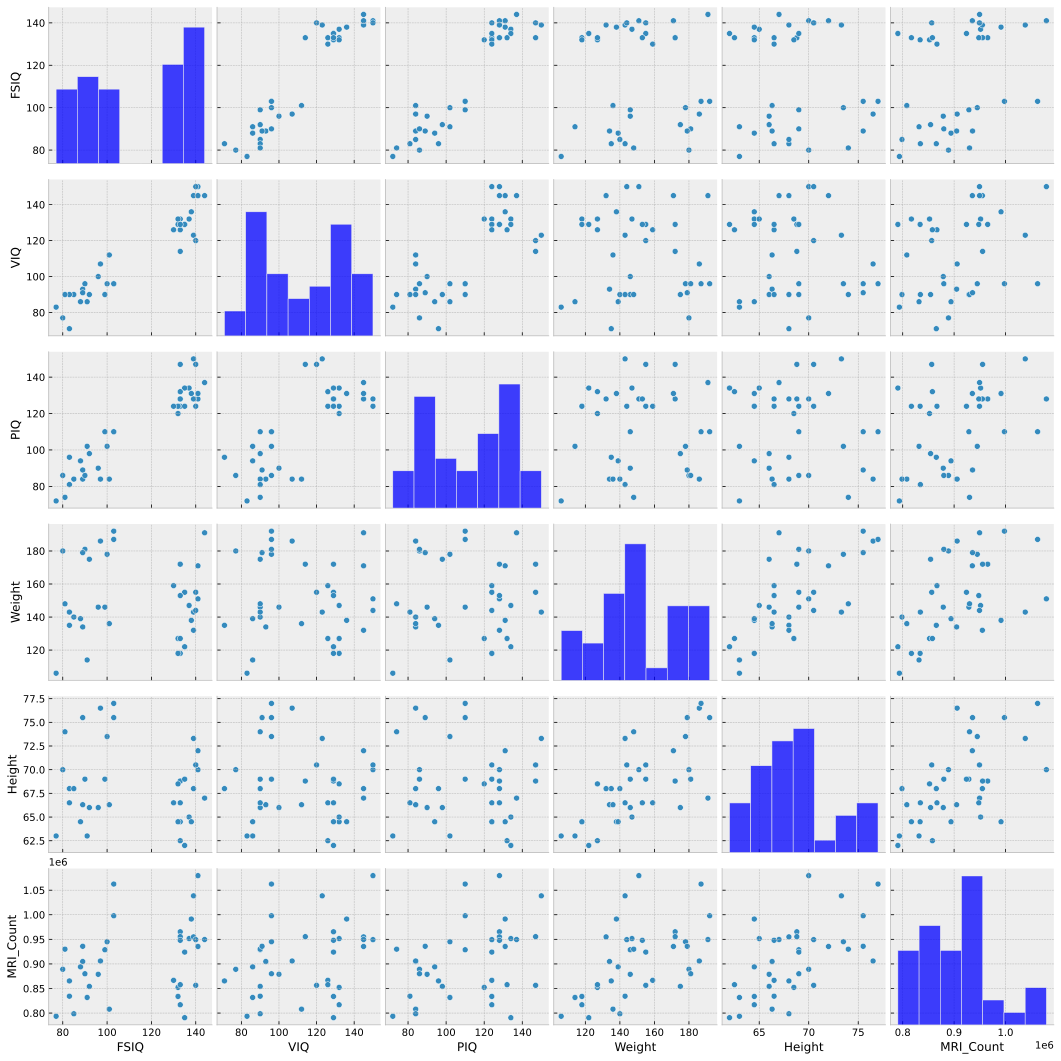

In [ ]:
sns.pairplot(brain_data)
plt.show()

Let's build the correlation matrix:

In [ ]:
brain_data.corr()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.945114,0.934427,-0.051483,-0.118448,0.333714
VIQ,0.945114,1.000000,0.776020,-0.076088,-0.118976,0.300279
PIQ,0.934427,0.776020,1.000000,0.002512,-0.093156,0.377782
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.118448,-0.118976,-0.093156,0.699614,1.000000,0.588377
MRI_Count,0.333714,0.300279,0.377782,0.513378,0.588377,1.000000


The correlation between a brine size and intelligence seems week. Let's test corelation with T-test of student.  

The liner correlation between "FSIQ" and "Height":

In [ ]:
# For male
x_male = brain_data.query("Gender == 'Male'")["FSIQ"].values
y_male = brain_data.query("Gender == 'Male'")["Height"].values

# For female
x_female = brain_data.query("Gender == 'Female'")["FSIQ"].values
y_female = brain_data.query("Gender == 'Female'")["Height"].values

# For both: male and female
x = brain_data["FSIQ"].values
y = brain_data["Height"].values

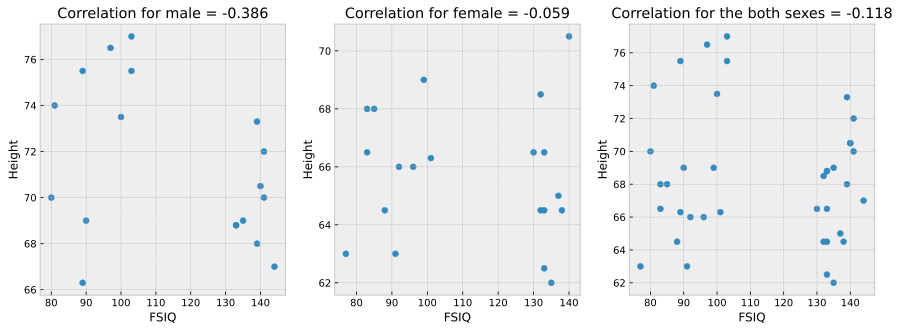

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# For male
ax[0].scatter(x_male,y_male)
ax[0].set(xlabel='FSIQ',ylabel='Height')
ax[0].set_title(f"Correlation for male = {round(np.corrcoef(x_male, y_male)[0][1], 3)}")

# For female
ax[1].scatter(x_female,y_female)
ax[1].set(xlabel='FSIQ',ylabel='Height')
ax[1].set_title(f"Correlation for female = {round(np.corrcoef(x_female, y_female)[0][1], 3)}")

# For both: male and female
ax[2].scatter(x,y)
ax[2].set(xlabel='FSIQ',ylabel='Height')
ax[2].set_title(f"Correlation for the both sexes = {round(np.corrcoef(x, y)[0][1], 3)}")

plt.show()

Let's provide testing: $H_0$: there is no correlation between "FSIQ" and "Height"; $H_1$: Correlation exists.

In [ ]:
# For male
r_m, p_val_m = st.pearsonr(x_male, y_male)
print(f"Test for male: r-Pearson = {r_m} and p-value = {p_val_m}")

# For female
r_f, p_val_f = st.pearsonr(x_female, y_female)
print(f"Test for female: r-Pearson = {r_f} and p-value = {p_val_f}")

# For both: male and female
r, p_val = st.pearsonr(x, y)
print(f"Test for the both sexes: r-Pearson = {r} and p-value = {p_val}")

Test for male: r-Pearson = -0.38586222962576183 and p-value = 0.11376056898421935
Test for female: r-Pearson = -0.05901125006340728 and p-value = 0.8048088233907591
Test for the both sexes: r-Pearson = -0.11844779001278681 and p-value = 0.4787779337272058


All P-values > $\alpha$ = 0.05 thus we cannot reject $H_0$.

Let's fulfill Spearman's corr test:

In [ ]:
# For male
rho_m, pval_m = st.spearmanr(x_male, y_male)
print(f"Test for male: rho-Spearman = {rho_m} and p-value = {pval_m}")

# For female
rho_f, pval_f = st.spearmanr(x_female, y_female)
print(f"Test for female: rho-Spearman = {rho_f} and p-value = {pval_f}")

# For both: male and female
rho_f, pval_f = st.spearmanr(x, y)
print(f"Test for the both sexes: rho-Spearman = {rho_f} and p-value = {pval_f}")

Test for male: rho-Spearman = -0.2846034597043514 and p-value = 0.25235238402474996
Test for female: rho-Spearman = -0.08646264076539244 and p-value = 0.7170120689008166
Test for the both sexes: rho-Spearman = 0.05844904240183812 and p-value = 0.7274149147413621


In general $\rho$ does not have the statistical significance and p-values > 0.05. All in All we can consider the absence of correlation between "FSIQ" and "Height".
___

The liner correlation between "VIQ" and "Height":

In [ ]:
# For male
x_male = brain_data.query("Gender == 'Male'")["VIQ"].values
y_male = brain_data.query("Gender == 'Male'")["Height"].values

# For female
x_female = brain_data.query("Gender == 'Female'")["VIQ"].values
y_female = brain_data.query("Gender == 'Female'")["Height"].values

# For both: male and female
x = brain_data["VIQ"].values
y = brain_data["Height"].values

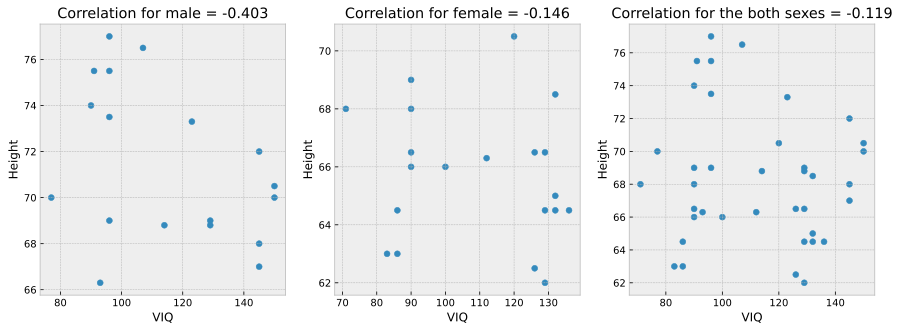

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# For male
ax[0].scatter(x_male,y_male)
ax[0].set(xlabel='VIQ',ylabel='Height')
ax[0].set_title(f"Correlation for male = {round(np.corrcoef(x_male, y_male)[0][1], 3)}")

# For female
ax[1].scatter(x_female,y_female)
ax[1].set(xlabel='VIQ',ylabel='Height')
ax[1].set_title(f"Correlation for female = {round(np.corrcoef(x_female, y_female)[0][1], 3)}")

# For both: male and female
ax[2].scatter(x,y)
ax[2].set(xlabel='VIQ',ylabel='Height')
ax[2].set_title(f"Correlation for the both sexes = {round(np.corrcoef(x, y)[0][1], 3)}")

plt.show()

Let's provide testing: $H_0$: there is no correlation between "VIQ" and "Height"; $H_1$: Correlation exists.

In [ ]:
# For male
r_m, p_val_m = st.pearsonr(x_male, y_male)
print(f"Test for male: r-Pearson = {r_m} and p-value = {p_val_m}")

# For female
r_f, p_val_f = st.pearsonr(x_female, y_female)
print(f"Test for female: r-Pearson = {r_f} and p-value = {p_val_f}")

# For both: male and female
r, p_val = st.pearsonr(x, y)
print(f"Test for the both sexes: r-Pearson = {r} and p-value = {p_val}")

Test for male: r-Pearson = -0.4027622870607285 and p-value = 0.09748739897167097
Test for female: r-Pearson = -0.1464528254374218 and p-value = 0.5378144527355213
Test for the both sexes: r-Pearson = -0.11897646229624852 and p-value = 0.4768033452699196


All P-values > $\alpha$ = 0.05 thus we cannot reject $H_0$.

Let's fulfill Spearman's corr test:

In [ ]:
# For male
rho_m, pval_m = st.spearmanr(x_male, y_male)
print(f"Test for male: rho-Spearman = {rho_m} and p-value = {pval_m}")

# For female
rho_f, pval_f = st.spearmanr(x_female, y_female)
print(f"Test for female: rho-Spearman = {rho_f} and p-value = {pval_f}")

# For both: male and female
rho_f, pval_f = st.spearmanr(x, y)
print(f"Test for the both sexes: rho-Spearman = {rho_f} and p-value = {pval_f}")

Test for male: rho-Spearman = -0.33733715508770323 and p-value = 0.1710050344349231
Test for female: rho-Spearman = -0.1014106648797052 and p-value = 0.6705305742906529
Test for the both sexes: rho-Spearman = -0.015669696564164268 and p-value = 0.9256069488919724


In general $\rho$ does not have the statistical significance and p-values > 0.05. All in All we can consider the absence of correlation between "VIQ" and "Height".
___

The liner correlation between "PIQ" and "Height":

In [ ]:
# For male
x_male = brain_data.query("Gender == 'Male'")["PIQ"].values
y_male = brain_data.query("Gender == 'Male'")["Height"].values

# For female
x_female = brain_data.query("Gender == 'Female'")["PIQ"].values
y_female = brain_data.query("Gender == 'Female'")["Height"].values

# For both: male and female
x = brain_data["PIQ"].values
y = brain_data["Height"].values

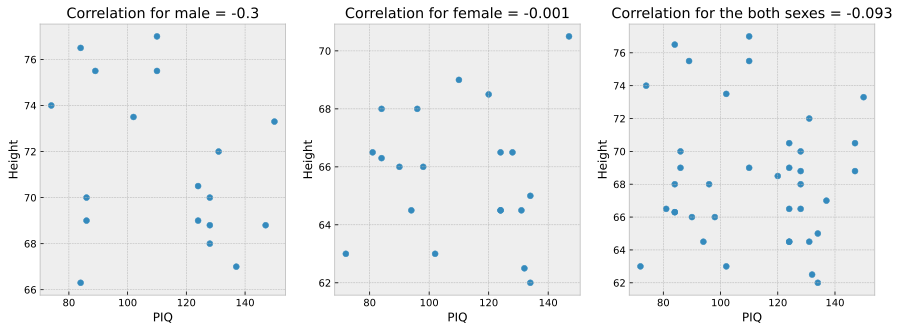

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# For male
ax[0].scatter(x_male,y_male)
ax[0].set(xlabel='PIQ',ylabel='Height')
ax[0].set_title(f"Correlation for male = {round(np.corrcoef(x_male, y_male)[0][1], 3)}")

# For female
ax[1].scatter(x_female,y_female)
ax[1].set(xlabel='PIQ',ylabel='Height')
ax[1].set_title(f"Correlation for female = {round(np.corrcoef(x_female, y_female)[0][1], 3)}")

# For both: male and female
ax[2].scatter(x,y)
ax[2].set(xlabel='PIQ',ylabel='Height')
ax[2].set_title(f"Correlation for the both sexes = {round(np.corrcoef(x, y)[0][1], 3)}")

plt.show()

Let's provide testing: $H_0$: there is no correlation between "PIQ" and "Height"; $H_1$: Correlation exists.

In [ ]:
# For male
r_m, p_val_m = st.pearsonr(x_male, y_male)
print(f"Test for male: r-Pearson = {r_m} and p-value = {p_val_m}")

# For female
r_f, p_val_f = st.pearsonr(x_female, y_female)
print(f"Test for female: r-Pearson = {r_f} and p-value = {p_val_f}")

# For both: male and female
r, p_val = st.pearsonr(x, y)
print(f"Test for the both sexes: r-Pearson = {r} and p-value = {p_val}")

Test for male: r-Pearson = -0.2995932052323113 and p-value = 0.22712339821731406
Test for female: r-Pearson = -0.0012419535855867567 and p-value = 0.9958537916972727
Test for the both sexes: r-Pearson = -0.09315558959239836 and p-value = 0.5780203153962258


All P-values > $\alpha$ = 0.05 thus we cannot reject $H_0$.

Let's fulfill Spearman's corr test:

In [ ]:
# For male
rho_m, pval_m = st.spearmanr(x_male, y_male)
print(f"Test for male: rho-Spearman = {rho_m} and p-value = {pval_m}")

# For female
rho_f, pval_f = st.spearmanr(x_female, y_female)
print(f"Test for female: rho-Spearman = {rho_f} and p-value = {pval_f}")

# For both: male and female
rho_f, pval_f = st.spearmanr(x, y)
print(f"Test for the both sexes: rho-Spearman = {rho_f} and p-value = {pval_f}")

Test for male: rho-Spearman = -0.32918035686056324 and p-value = 0.18224720429365243
Test for female: rho-Spearman = -0.12021340843258509 and p-value = 0.6136771814550783
Test for the both sexes: rho-Spearman = -0.06170333395927581 and p-value = 0.7128659571691423


In general $\rho$ does not have the statistical significance and p-values > 0.05. All in All we can consider the absence of correlation between "VIQ" and "Height".
___

**The takeaway:** there is no the statistical significant correlation between a brain size and intelligence.
___

##Part 2.
---

In [ ]:
cars_prefes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         300 non-null    int64
 1   Age        300 non-null    int64
 2   Sex        300 non-null    int64
 3   LicYr      300 non-null    int64
 4   LicMth     300 non-null    int64
 5   ActCar     300 non-null    int64
 6   Kids5      300 non-null    int64
 7   Kids6      300 non-null    int64
 8   PreferCar  300 non-null    int64
 9   Car15K     300 non-null    int64
 10  Reason     300 non-null    int64
 11  Cost       300 non-null    int64
 12  Reliable   300 non-null    int64
 13  Perform    300 non-null    int64
 14  Fuel       300 non-null    int64
 15  Safety     300 non-null    int64
 16  AC/PS      300 non-null    int64
 17  Park       300 non-null    int64
 18  Room       300 non-null    int64
 19  Doors      300 non-null    int64
 20  Prestige   300 non-null    int64
 21  Colour     300 n

In [ ]:
cars_prefes_data.head()

,ID,Age,Sex,LicYr,LicMth,ActCar,Kids5,Kids6,PreferCar,Car15K,...,Reliable,Perform,Fuel,Safety,AC/PS,Park,Room,Doors,Prestige,Colour
0,110,18,2,0,2,3,2,2,2,2,...,4,3,3,3,3,3,3,3,3,2
1,111,25,1,8,0,1,2,2,1,1,...,4,4,4,4,3,4,4,2,3,3
2,112,63,2,46,0,3,2,2,3,2,...,3,3,3,3,3,3,3,3,3,3
3,113,51,1,35,0,3,2,2,2,2,...,3,3,3,4,3,3,3,3,1,3
4,114,19,1,2,0,2,2,2,2,1,...,3,4,3,3,2,3,3,2,3,3


In order to check statistical difference between car preferences and sex let's set hypotheses: $H_0$ - there is no any connections; $H_1$ - the connection exists. 

In [ ]:
ds_table = pd.crosstab(cars_prefes_data["Sex"], cars_prefes_data["PreferCar"])
ds_table 

PreferCar,1,2,3,4
Sex,,,,
1,43,75,26,6
2,25,61,47,17


In [ ]:
observed_val = ds_table.values
print(f"The observed values: {observed_val}")

The observed values: [[43 75 26  6]
 [25 61 47 17]]


In [ ]:
val = st.chi2_contingency(observed_val)

In [ ]:
expected_val = val[3]
print(f"The expected values: {expected_val}")

The expected values: [[34.  68.  36.5 11.5]
 [34.  68.  36.5 11.5]]


In [ ]:
n_rows = ds_table.shape[0]
n_cols = ds_table.shape[1]
df = (n_rows - 1) * (n_cols - 1)
alpha = 0.05

In [ ]:
chi_sqr = sum([(o-e)**2/e for o, e in zip(observed_val, expected_val)])
chi_sqr_stat = chi_sqr[0] + chi_sqr[1]
print(f"The Chi-square statistic: {chi_sqr_stat}")

critical_val = st.chi2.ppf(q=1-alpha, df=df)
print(f"The critical value: {critical_val}")

p_value = 1 - st.chi2.cdf(x=chi_sqr_stat, df=df)
print(f"The p-value: {p_value}")

The Chi-square statistic: 6.205882352941177
The critical value: 7.814727903251179
The p-value: 0.10201211569314239


$\chi^2$ < **critical value** and **P-value** > $\alpha$ thus we cannot reject $H_0$ and we're considering there is no statistically significant relationship between "Sex" and "PreferCar".
___

# Task 3

You can find and download a dataset there:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


1) For any country (you are free to choose any of the presented) 
 *  Visualize a feature **suicides_no** considering other features: **sex**, **age** (or **generation**) and year;
 *  Check whether there is statistical difference for suicide number between these groups: men / women. If it is found, can we claim that people of certain sex are more prone to suicides or do we need additional information?

2) For 2016: divide countries into 3-4 groups according to the values of the **gdp_per_capita** feature (use statistical characteristics to determine how to divide the data into groups), check if the suicides / 100k pop indicator differs in these groups. Do not forget that for each country you have several values and they need to be aggregated or checked for each group separately.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/datasets/master.csv'

Mounted at /content/gdrive


##Part 1.

Pre-processing

In [ ]:
df = pd.read_csv(root_path)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
df.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)

In [ ]:
df["gdp_for_year"] = df["gdp_for_year"].str.replace(",","").astype(np.int64)
df["age"] = df["age"].str.replace("5-14 years","05-14 years")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_pop    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI_for_year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  int64  
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [ ]:
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [ ]:
tets_df = df.query("country =='Russian Federation'")
tets_df

,country,year,sex,age,suicides_no,population,suicides_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
20936,Russian Federation,1989,male,75+ years,1393,1349100,103.25,Russian Federation1989,NaN,506500173960,3740,G.I. Generation
20937,Russian Federation,1989,male,35-54 years,12030,18058500,66.62,Russian Federation1989,NaN,506500173960,3740,Silent
20938,Russian Federation,1989,male,55-74 years,6250,9383700,66.60,Russian Federation1989,NaN,506500173960,3740,G.I. Generation
20939,Russian Federation,1989,male,25-34 years,6856,12748800,53.78,Russian Federation1989,NaN,506500173960,3740,Boomers
20940,Russian Federation,1989,female,75+ years,1677,4738100,35.39,Russian Federation1989,NaN,506500173960,3740,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...,...,...
21255,Russian Federation,2015,female,25-34 years,730,12264840,5.95,Russian Federation2015,NaN,1368400705491,9987,Millenials
21256,Russian Federation,2015,female,55-74 years,1062,18280577,5.81,Russian Federation2015,NaN,1368400705491,9987,Boomers
21257,Russian Federation,2015,female,15-24 years,378,7653174,4.94,Russian Federation2015,NaN,1368400705491,9987,Millenials
21258,Russian Federation,2015,male,05-14 years,79,7836667,1.01,Russian Federation2015,NaN,1368400705491,9987,Generation Z


For the aim of test the Russian Federation has been chosen. 

Let's visualize a feature **suicides_no** considering **sex** with **age**:

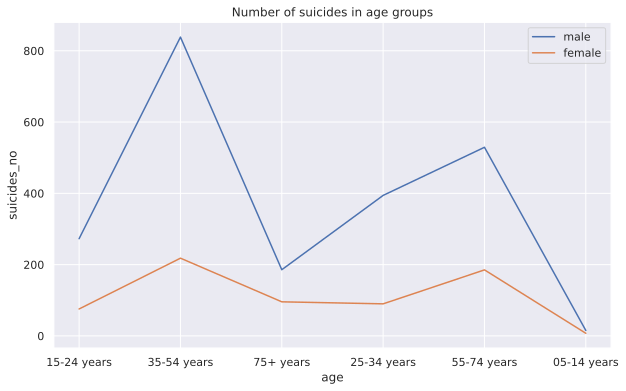

Number of records for male: 13910
Number of records for female: 13910


In [ ]:
sns.set(rc = {'figure.figsize':(10,6)})

df_m = df.query("sex == 'male'")
df_f = df.query("sex == 'female'")

sns.lineplot(data=df_m, x="age", y="suicides_no", ci = None)
sns.lineplot(data=df_f, x="age", y="suicides_no", ci = None)
plt.legend(["male", 'female'])
plt.title("Number of suicides in age groups")
plt.show()
print(f"Number of records for male: {df_m.shape[0]}")
print(f"Number of records for female: {df_f.shape[0]}")

Let's check connection with number of suicides and age separately for men and women. First of all we set hypotheses: $H_0$ - threre is no difference, $H_1$ - the difference exists. Since one feature is numerical and another is categorical we have to use ANOVA:

In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
anova_df_m = df_m[["suicides_no", "age"]]
anova_m = smf.ols(formula='suicides_no ~ C(age)', data=anova_df_m).fit()
print(anova_m.summary())

                            OLS Regression Results                            
Dep. Variable:            suicides_no   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     135.8
Date:                Thu, 24 Mar 2022   Prob (F-statistic):          4.62e-141
Time:                        03:46:38   Log-Likelihood:            -1.1823e+05
No. Observations:               13910   AIC:                         2.365e+05
Df Residuals:                   13904   BIC:                         2.365e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                15.30

As we can see P-value is significantly smaller than $\alpha$ = 0.05, thereby we can reject $H_0$ for male.  

In [ ]:
anova_df_f = df_f[["suicides_no", "age"]]
anova_f = smf.ols(formula='suicides_no ~ C(age)', data=anova_df_f).fit()
print(anova_f.summary())

                            OLS Regression Results                            
Dep. Variable:            suicides_no   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     129.1
Date:                Thu, 24 Mar 2022   Prob (F-statistic):          3.57e-134
Time:                        03:46:45   Log-Likelihood:            -1.0023e+05
No. Observations:               13910   AIC:                         2.005e+05
Df Residuals:                   13904   BIC:                         2.005e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.37

The P-value is still significantly smaller than $\alpha$ = 0.05, thus we can reject $H_0$ for female as well.

Since P-value points to sagnificant difference we need to condact post-hoc-test.

In [ ]:
import statsmodels.sandbox.stats.multicomp as multi

Let's fulfill Tukey Honestly Significant Difference test for male:

In [ ]:
print(multi.MultiComparison(df_m["suicides_no"], df_m["age"]).tukeyhsd())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------
05-14 years 15-24 years  257.4723  0.001  157.8266   357.118   True
05-14 years 25-34 years  378.9648  0.001  279.3191  478.6104   True
05-14 years 35-54 years  823.0919  0.001  723.4462  922.7375   True
05-14 years 55-74 years  513.9574  0.001  414.3118  613.6031   True
05-14 years   75+ years  170.4533  0.001   70.8077   270.099   True
15-24 years 25-34 years  121.4925 0.0067   22.0193  220.9656   True
15-24 years 35-54 years  565.6196  0.001  466.1464  665.0927   True
15-24 years 55-74 years  256.4851  0.001  157.0119  355.9583   True
15-24 years   75+ years   -87.019 0.1257 -186.4921   12.4542  False
25-34 years 35-54 years  444.1271  0.001  344.6539  543.6003   True
25-34 years 55-74 years  134.9927 0.0015   35.5195  234.4659   True
25-34 years   75+ years -208.5114  0.001 -307.98

And female:

In [ ]:
print(multi.MultiComparison(df_f["suicides_no"], df_f["age"]).tukeyhsd())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower    upper   reject
------------------------------------------------------------------
05-14 years 15-24 years   68.2128  0.001    40.886  95.5397   True
05-14 years 25-34 years   82.5972  0.001   55.2703  109.924   True
05-14 years 35-54 years  210.7359  0.001   183.409 238.0628   True
05-14 years 55-74 years  177.9065  0.001  150.5796 205.2334   True
05-14 years   75+ years   88.2676  0.001   60.9407 115.5944   True
15-24 years 25-34 years   14.3843  0.641  -12.8953  41.6639  False
15-24 years 35-54 years  142.5231  0.001  115.2435 169.8026   True
15-24 years 55-74 years  109.6937  0.001   82.4141 136.9732   True
15-24 years   75+ years   20.0547 0.2898   -7.2249  47.3343  False
25-34 years 35-54 years  128.1387  0.001  100.8592 155.4183   True
25-34 years 55-74 years   95.3093  0.001   68.0298 122.5889   True
25-34 years   75+ years    5.6704    0.9  -21.6092    32.95  F

**The takeaway:** we're considering sagnificant connection between number of suicides and age. Based on Tukey HSD test we have much more age group amon men when P-value is rather small. Thereby we can conclude that men more likely to commit suicide that women.
___

##Part 2.

Let's take a look on data for 2016 year.

In [ ]:
df_2016 = df.query("year == 2016")

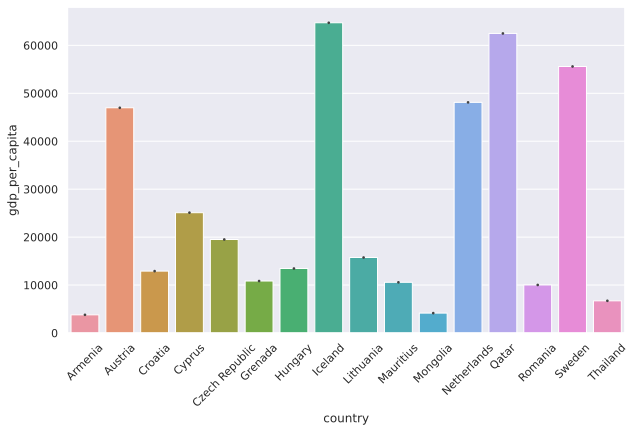

In [ ]:
ax = sns.barplot(data=df_2016, y="gdp_per_capita", x="country")
ax.tick_params(axis='x', labelrotation = 45)

It seems data could be devided by quantiles.

In [ ]:
df_grp = df_2016.groupby(["country"]).agg({"gdp_per_capita":np.sum})
df_grp

,gdp_per_capita
country,
Armenia,37880
Austria,469760
Croatia,129050
Cyprus,250980
Czech Republic,195050
Grenada,108380
Hungary,134480
Iceland,647080
Lithuania,157420


In [ ]:
df_grp["country_bin"] = pd.qcut(df_grp["gdp_per_capita"], 4, labels=["1=20%", "2=50%", "3=75%", "4=100%"])

In [ ]:
df_grp

,gdp_per_capita,country_bin
country,,
Armenia,37880,1=20%
Austria,469760,3=75%
Croatia,129050,2=50%
Cyprus,250980,3=75%
Czech Republic,195050,3=75%
Grenada,108380,2=50%
Hungary,134480,2=50%
Iceland,647080,4=100%
Lithuania,157420,3=75%


In [ ]:
df_new = df_2016.merge(df_grp["country_bin"], how='left', on='country')

In [ ]:
df_new.head()

,country,year,sex,age,suicides_no,population,suicides_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation,country_bin
0,Armenia,2016,male,75+ years,12,61956,19.37,Armenia2016,NaN,10546135160,3788,Silent,1=20%
1,Armenia,2016,male,55-74 years,16,237813,6.73,Armenia2016,NaN,10546135160,3788,Boomers,1=20%
2,Armenia,2016,male,35-54 years,16,350633,4.56,Armenia2016,NaN,10546135160,3788,Generation X,1=20%
3,Armenia,2016,male,15-24 years,5,202220,2.47,Armenia2016,NaN,10546135160,3788,Millenials,1=20%
4,Armenia,2016,female,75+ years,2,102414,1.95,Armenia2016,NaN,10546135160,3788,Silent,1=20%


Now we have a new dataset with the new feature "country_bin". Let's take a look on the destribution:

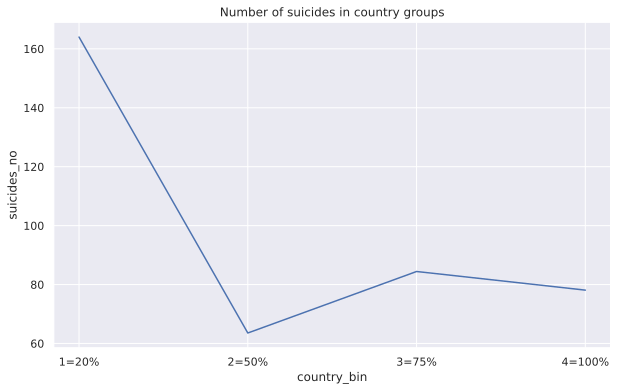

In [ ]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.lineplot(data=df_new, x="country_bin", y="suicides_no", ci = None)

plt.title("Number of suicides in country groups")
plt.show()

In [ ]:
df_new.country_bin.value_counts()

1=20%     40
2=50%     40
3=75%     40
4=100%    40
Name: country_bin, dtype: int64

Well, as we can see, group of countries having small **gdp_per_capita** has sagnificant level of suicides. Let's conduct statistical test, but firstly we set hypotheses: $H_0$ - there is no difference, $H_1$ - the difference exists.

In [ ]:
anova_df_new = df_new[["suicides_no", "country_bin"]]
print(smf.ols(formula='suicides_no ~ C(country_bin)', data=anova_df_new).fit().summary())

                            OLS Regression Results                            
Dep. Variable:            suicides_no   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.813
Date:                Thu, 24 Mar 2022   Prob (F-statistic):             0.0412
Time:                        03:48:30   Log-Likelihood:                -1047.1
No. Observations:                 160   AIC:                             2102.
Df Residuals:                     156   BIC:                             2114.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

As we can see P-value = 0.0412 that is less then $\alpha$ = 0.05 thereby we can reject $H_0$. Further we have to fulfill post-hoc-test. 

In [ ]:
print(multi.MultiComparison(df_new["suicides_no"], df_new["country_bin"]).tukeyhsd())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
 1=20%  2=50%  -100.45 0.0451 -199.3733  -1.5267   True
 1=20%  3=75%  -79.575 0.1613 -178.4983  19.3483  False
 1=20% 4=100%    -85.9 0.1134 -184.8233  13.0233  False
 2=50%  3=75%   20.875    0.9  -78.0483 119.7983  False
 2=50% 4=100%    14.55    0.9  -84.3733 113.4733  False
 3=75% 4=100%   -6.325    0.9 -105.2483  92.5983  False
-------------------------------------------------------


Based on Tukey HSD test we can see that our assumption is only applying for group of countries with small gdp. However the assumption doesn't propagate on the rest of others countries because of P-value > $\alpha$.